<a href="https://colab.research.google.com/github/Samuel-Egbert31415/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/133_Multiple_Regression_Assignment_Samuel_Egbert_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.

### Instructions

* **Download this notebook** as you would any other ipynb file
* **Upload** to Google Colab or work locally (if you have that set-up)
* **Delete `raise NotImplementedError()`**
* Write your code in the `# YOUR CODE HERE` space
* **Execute** the Test cells that contain `assert` statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)
* **Save** your notebook when you are finished
* **Download** as a `ipynb` file (if working in Colab)
* **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)

# Lambda School Data Science - Unit 1 Sprint 3 Module 3

## Module Project: Multiple Linear Regression

### Learning Objectives

* model the relationship of multiple predictor variables to a single outcome
* conduct a t-test to determine the significance of individual variables in the model
* compare model fit using R-squared

## Part A: Introduction

### Statistical significance between head size and brain weight in healthy adult humans

The `Brainhead.csv` dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed).

**We wish to determine if we can improve on our model of the linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

### Use the above information to complete the following tasks.

**Task 1** - Load the data

Let's load the data! The URL has been provided as well as the imports for pandas and numpy.

* load your CSV file into a DataFrame named `df`

In [131]:
# Task 1

import pandas as pd
import numpy as np

data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

df = pd.read_csv(data_url)

# Print out your DataFrame
df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [132]:
# Task 1 - Test

assert isinstance(df, pd.DataFrame), 'Have you created a DataFrame named `df`?'
assert len(df) == 237


**Task 2** - Fit OLS MOdel

Run the OLS model relating head size to brain weight - you should have done this in your project yesterday. The `statsmodels.formula.api` import has been provided. After you fit your model, print out your model results.

* Fit an OLS model and name your variable `model`.

*Hint: Make sure to use the format Y ~ X*

In [133]:
# Task 2

# Import statsmodels - DON'T Delete

from statsmodels.formula.api import ols

model = ols('Brain ~ Head', data = df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           5.96e-54
Time:                        22:12:09   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.0

In [134]:
# Task 2 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 3** - Adjusted $R^2$

Using your model summary, what is the adjusted $R^2$ for this model?  

* Assign the value of adjusted $R^2$ to the variable `adj_R2` (use three decimal places, e.g. 0.123). Your variable should be a float.

In [135]:
# Task 3

adj_R2 = 0.638

# Print the adjusted R^2 value
print('The adjusted R^2 is: ', adj_R2)

The adjusted R^2 is:  0.638


In [136]:
# Task 3 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 3** - Short answer

1. Explain what this value means in a complete sentence.

---

1. 63.8% in the variability of brain weight can be explained by changes in head volume

**Task 4** - Encoding new variables

From the data dictionary for this data set:

Gender
* 1 = male
* 2 = female

Age
* 1 = younger than age 46
* 2 = age 46 and older

Right now age and gender are coded with 1 and 2.  Just to be safe when we run our model, we want to subtract "1" from Age and Gender so that "1" is now coded as "0" and "2" is now coded as "1".  Create two new columns in the DataFrame to do this - don't overwrite the original columns!

**Your tasks:**

* Create a new Series (column) for age and give it the column name `age_01`.
* Create a new Series (column) for gender and give it the column `gender_01`.

In [137]:
# Task 4
df['age_01'] = 0
for index, age in  enumerate(df['Age']):
  if age == 2:
    df['age_01'][index] = 1
  elif age == 1:
    df['age_01'][index] = 0

def reduction(param):
  if param == 2:
    param = 1
  else:
    param = 0
  return param
# End Function

df['age_01'] = df['Age'].apply(reduction)
df['gender_01'] = df['Gender'].apply(reduction)


# # View the DataFrame
print(df['age_01'].value_counts())
print(df['Age'].value_counts())
print(df['gender_01'].value_counts())
print(df['Gender'].value_counts())
print(df)

1    127
0    110
Name: age_01, dtype: int64
2    127
1    110
Name: Age, dtype: int64
0    134
1    103
Name: gender_01, dtype: int64
1    134
2    103
Name: Gender, dtype: int64
     Gender  Age  Head  Brain  age_01  gender_01
0         1    1  4512   1530       0          0
1         1    1  3738   1297       0          0
2         1    1  4261   1335       0          0
3         1    1  3777   1282       0          0
4         1    1  4177   1590       0          0
..      ...  ...   ...    ...     ...        ...
232       2    2  3214   1110       1          1
233       2    2  3394   1215       1          1
234       2    2  3233   1104       1          1
235       2    2  3352   1170       1          1
236       2    2  3391   1120       1          1

[237 rows x 6 columns]


In [138]:
# Task 4 - Test

assert df.shape == (237, 6), 'Did you add two new columns (and only two)?'


**Task 5** - Multiple Regression (adding in "Age")

We're going to try to improve our model by fitting a model on more than one independent parameter.

* Fit a model to Y (brain weight) and X1 and X2 (head size and age group); assign your model to the variable `model_2` (make sure to use `Age_01` for the age variable)

*Hint: Enter the model in the format Y ~ X1 + X2*

In [139]:
# Task 5

# Model input format: Y ~ X1 + X2*

model_2 = ols('Brain ~ Head + age_01', data=df).fit()

# Print the model summary
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     214.1
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           1.38e-53
Time:                        22:12:20   Log-Likelihood:                -1347.8
No. Observations:                 237   AIC:                             2702.
Df Residuals:                     234   BIC:                             2712.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    347.5505     47.811      7.269      0.0

In [140]:
# Task 5 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 6** - Statistical significance

* Find the p-value for `Age_01` in your model and assign it to the variable `pval_age` (use three decimal places, e.g. 0.123). Your value should be a float.

At the alpha = 0.05 level, is age group statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

ANSWER: p-value for age_01 = 0.029, which means that after accounting for head size, age_01 is non-randomly associated with brain weight

At the alpha = 0.01 level, is age group statistically significantly associated with brain weight after accounting for head size? Explain your answer in at least one complete sentence.

p > p>.01, which means that we cannot with confidence say that age groups is non-randomly associatated with brain weight after accounting for head size


In [141]:
# Task 6

pval_age = 0.029

In [142]:
# Task 6 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 7** - Adjusted $R^2$

What is the adjusted $R^2$ for the model relating head size and age group to brain weight?  

* Assign the adjusted $R^2$ value to `adj_R2_new`. This value should be a float.

Does adding age group to the model increase the amount of variability in brain weight explained by the model?

ANSWER:

In [143]:
# Task 7

adj_R2_new  = 0.644

# Print the adjusted R^2 new value
print('The adjusted R^2 new is: ', adj_R2_new)

The adjusted R^2 new is:  0.644


In [144]:
# Task 7 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 8** - Multiple Regression (adding in Gender)

We're going to try another multiple regression to improve our model!

* Fit a model to Y (brain weight) and X1 and X2 (head size and gender); assign your model to the variable `model_3` (make sure to use `Gender_01` for the age variable).

*Hint: Enter the model in the format Y ~ X1 + X2*

In [145]:
# Task 8

# Model input format: Y ~ X1 + X2*

model_3 = ols('Brain ~ Head + gender_01', data=df).fit()

# Print the model summary
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     211.0
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           4.15e-53
Time:                        22:12:27   Log-Likelihood:                -1348.9
No. Observations:                 237   AIC:                             2704.
Df Residuals:                     234   BIC:                             2714.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    378.7139     57.299      6.609      0.0

In [146]:
# Task 8 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 9** - Significance (short answer)

At the alpha = 0.05 level, is gender statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

At the alpha = 0.05 level, after accounting for head size, gender is no statistically associated with brain weight.

**Task 10** - Linear model equation (short answer)

Write the linear model (insert the coefficients in the correct places) used to model the relationship between head size, age group and predicted brain weight. *Make sure to use the correct model!*

Bw = intercept + Headslope*(headsize) +Genderslope*(gender value)

**Task 11** - Create a plot!

Plot the relationship between head size and brain weight on a scatterplot. Use different color dots to represent older and younger individuals. You can use `matplotlib` or `seaborn`.

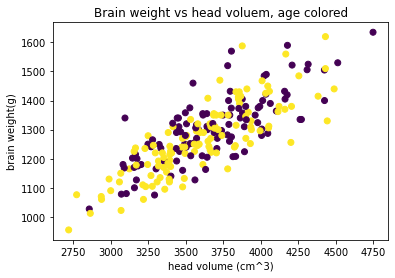

In [147]:
# Task 11

import matplotlib.pyplot as plt
fig, ax = plt.subplots() 

plt.scatter(x = df['Head'], y = df['Brain'], c = df['age_01'])

ax.set_title('Brain weight vs head voluem, age colored')
ax.set_xlabel('head volume (cm^3)')
ax.set_ylabel('brain weight(g)')

plt.show()

**Task 12** - Make predictions

Estimate the brain weight of a 60-year-old with a head size of 4000 cubic cm. **Make sure to select the correct model you fit above!**

* assign the head size to the variable `x1` (integer)
* assign the age group (either a 0 or 1) to the variable `x2` (integer)
* assign the intercept to `intercept` (float)
* assign the slope parameter for the head size to `slope1` (float)
* assign the slope parameter for age to `slope2` (float)
* assign the prediction to the variable `predicted` (float)

In [148]:
# Task 12

x1 = 4000
x2 = 1
intercept = 347.5505
slope1 = 0.2604
slope2 = -20.7316
predicted = intercept + slope1*x1 + slope2*x2
predicted = round(predicted,4)
# Print out variables to troubleshoot!
# print('slope 1:', slope1)

# View your prediction
print('The predicted value for brain size is:', predicted)

The predicted value for brain size is: 1368.4189


In [149]:
# Task 12 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 13** - Make another prediction

Estimate the brain weight of a 20-year-old with a head size of 3900 cubic cm. Use the same slope and intercept parameters you used above. But - change your `x1` and `x2` values!

* change the values for `x1` and `x2` (both are integers)
* assign your prediction to the variable `predicted_2` (float)

In [150]:
# Task 13

x1 = 3900
x2 = 0
intercept = 347.5505
slope1 = 0.2604
slope2 = -20.7316
predicted_2 = intercept + slope1*x1 + slope2*x2
predicted_2 = round(predicted_2,4)

# View your prediction
print('The predicted value for brain size is:', predicted_2)


The predicted value for brain size is: 1363.1105


In [117]:
# Task 13 - Test
# Hidden tests - you will see the results when you submit to Canvas

## Part B

### Sleep Data

Use the following information to answer the rest of the tasks in this project.

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 

Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.

**Data Dictionary:**

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



**Task 14**

Before we can look at the data, we need to load in the data. The URL has been provided.

* Load in the CSV file as a DataFrame and assign it to the variable `df_sleep`.
* Make sure to view the DataFrame!

In [151]:
# Task 14

# Dataset URL - don't delete!
data_url_2 = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

df_sleep = pd.read_csv(data_url_2)

# Print out your DataFrame
df_sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


At the end of the guided project, we'd decided that the best model of dreaming sleep has the two variables gestation time and danger index.  

**Task 15** - Plot

Plot the relationship of body size to dreaming sleep. Turn off the CI on the plot (`ci = None`). Describe the shape of the relationship.

Hard to know what the relationship is from this plot.  there are outliers that are potentially skewing the line

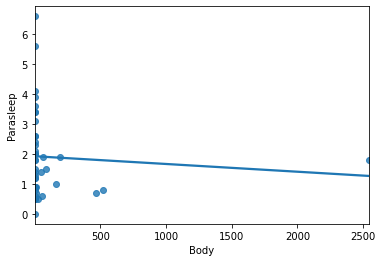

In [152]:
# Task 15

import seaborn as sns

ax = sns.regplot(x="Body", y="Parasleep", data=df_sleep, ci=None)


**Task 16** - Transformation: take the log

Does it appear that a log transformation of the `Body` variable would improve the model fit? Let take the log and then look at the plot again.

* Create a new column with the log of `Body` and add it as a column to `df_sleep` with the name `log_body`.
* Create a new column with the log of gestational time and add it as a column to `df_sleep` with the name `log_gest` 

*Hint: use the natural log `np.log()`*

In [154]:
# Task 16

df_sleep['log_body'] = np.log(df_sleep['Body'])
df_sleep['log_gest'] = np.log(df_sleep['Gest'])

# Print out the updated DataFrame
df_sleep.head()


,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,log_body,log_gest
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,0.000000,3.737670
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,7.842671,6.436150
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,2.356126,5.192957
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,-3.772261,3.555348
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,5.075174,5.971262


In [155]:
# Task 16 - Test
assert df_sleep.shape == (42, 13), 'Make sure you added two columns.'

# Hidden tests - you will see the results when you submit to Canvas

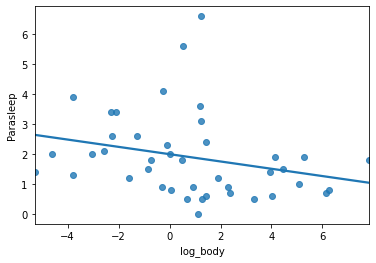

In [156]:
# Task 16 - Plot
# NOT autograded

ax = sns.regplot(x="log_body", y="Parasleep", data=df_sleep, ci=None)


**Task 17** - Multiple Regression Model

Run an OLS model using gestation time, danger index and the log of body size.  
(This task will not be autograded)

Is the log of body size statistically significantly associated with time spent in dreaming sleep after accounting for the other two factors?

YOUR ANSWER

In [157]:
# Task 17

# Enter the model in the format Y ~ X1 + X2 + X3

model_gest_danger_log_body = ols('Parasleep ~ log_gest + Danger + log_body', data=df_sleep).fit()

# Print the model summary
print(model_gest_danger_log_body.summary())


                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     16.97
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           3.73e-07
Time:                        22:18:25   Log-Likelihood:                -55.030
No. Observations:                  42   AIC:                             118.1
Df Residuals:                      38   BIC:                             125.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0532      0.858      8.219      0.0

**Task 18** - Plot

Plot the relationship of gestational time and dreaming sleep with different colors for animals who experience different amounts of sleep exposure.

(This task will not be autograded)

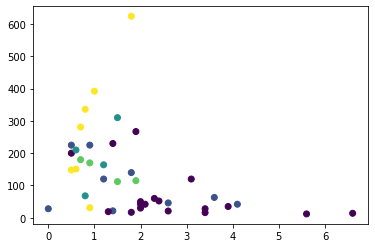

In [162]:
# Task 18
# NOT autograded


import matplotlib.pyplot as plt
fig, ax = plt.subplots() 

plt.scatter(x = df_sleep['Parasleep'], y = df_sleep['Gest'], c = df_sleep['Exposure'])


plt.show()

**Task 19** - Multiple Regression Model

Run an OLS model using the log of gestation time and sleep exposure index to predict the amount of time spent in dreaming sleep.  Is sleep exposure index a better predictor of amount of time spent in dreaming sleep than danger index?

(This task will not be autograded)

ANSWER: 
# not yet completed

In [159]:
# Task 19
# NOT autograded

model_gest_danger_log_body = ols('Parasleep ~ log_gest + Danger + log_body', data=df_sleep).fit()

# Print the model summary
print(model_gest_danger_log_body.summary())



**Task 20** - Plot

Plot the relationship of gestational time and dreaming sleep with different colors for animals who experience different amounts of sleep exposure.

(This task will not be autograded)

ANSWER: 
# not yet completed

In [163]:
# Task 20
# NOT autograded

# not yet completed


plt.show()

**Task 21** - Multiple Regression Model

Run an OLS model using the log of gestation time and predation index to predict the amount of time spent in dreaming sleep.  Is predation index a better predictor of amount of time spent in dreaming sleep than danger index?

(This task will not be autograded)

ANSWER: 
# not yet completed

In [ ]:
# Task 21
# NOT autograded


# not yet completed

# Print the model summary


## Portfolio Project Assignment

Get (and give) constructive feedback to a peer.  Swap projects with at least one other student, and give each other constructive feedback.  Make sure to tell them what you like about their project as well as any suggestions you have for improvement.